## 변환(Transformation)

In [1]:
# 표준화(scipy.stat.zscore())

import numpy as np
import scipy.stats as ss


data = np.random.normal(loc = 5, scale = 2, size = 300)
z_score = ss.zscore(data)

(array([ 2.,  5., 12., 35., 53., 64., 57., 40., 25.,  7.]),
 array([-3.11524331, -2.56545306, -2.01566281, -1.46587256, -0.91608231,
        -0.36629206,  0.18349819,  0.73328844,  1.28307869,  1.83286894,
         2.38265919]),
 <a list of 10 Patch objects>)

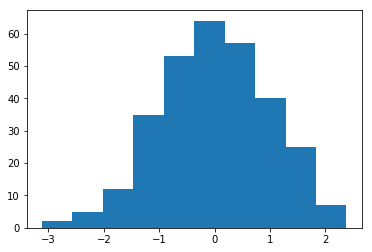

In [2]:
import matplotlib.pyplot as plt

# 노트북 안에 그래프 그리기
%matplotlib inline

plt.hist(z_score)

In [3]:
# 0 ~ 1 변환(sklearn.preprocessing.MinMaxScaler(),sklearn.preprocessing.minmax_scale())

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, minmax_scale

X = np.array([[10,-10,1],[5,0,2],[0,10,3]])
X

array([[ 10, -10,   1],
       [  5,   0,   2],
       [  0,  10,   3]])

In [4]:
MinMaxScaler().fit_transform(X) # 0~1변환 후 소수발생으로 자동형변환이 되었다는 에러메시지 발생

C:\Users\DS-18-D3-001\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [5]:
minmax_scale(X, axis = 0 , copy = True) # 0~1변환 후 소수발생으로 자동형변환이 되었다는 에러메시지 발생

C:\Users\DS-18-D3-001\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([[1. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [0. , 1. , 1. ]])

In [6]:
# 이분변환(sklearn.preprocessing.Binarizer(),sklearn.preprocessing.binarize())

from sklearn.preprocessing import Binarizer, binarize

Binarizer(threshold = 2.0).fit_transform(X) # threshold : 이분변환 기준점

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [7]:
binarize(X)

array([[1, 0, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [33]:
# 연속형 변수의 구간화

import numpy as np
import pandas as pd
from pandas import DataFrame

df = DataFrame({'C1' : np.random.randn(20),
                'C2' : ['a','a','a','a','a','a','a','a','a','a',
                        'b','b','b','b','b','b','b','b','b','b']})
df

,C1,C2
0,-0.294454,a
1,0.490113,a
2,-0.480174,a
3,-0.130276,a
4,-0.972130,a
5,0.145773,a
6,-0.246389,a
7,0.083920,a
8,-0.587816,a
9,-0.088168,a


In [34]:
# 시작값과 끝값을 균등하게 분할(linspace())
bins = np.linspace(start = df['C1'].min(), stop = df['C1'].max(), num = 10)
bins

array([-1.74504958, -1.43316394, -1.12127831, -0.80939267, -0.49750704,
       -0.18562141,  0.12626423,  0.43814986,  0.7500355 ,  1.06192113])

In [44]:
# 분할된 bins에 맞게 구간 생성(digitize(data, bins))
df['C1_bin'] = np.digitize(df['C1'], bins)
df

0   -0.294454
1    0.490113
2   -0.480174
Name: C1, dtype: float64

In [11]:
# 구간화 후 통계량 살펴보기
df.groupby('C1_bin')['C1'].mean()

C1_bin
1    -1.196219
2    -0.685461
3    -0.213328
4     0.139799
5     0.531762
6     0.939309
7     1.257822
10    2.340584
Name: C1, dtype: float64

In [12]:
# 구간화 후 통계량 살펴보기
df.groupby('C1_bin')['C1'].size()

C1_bin
1     1
2     2
3     3
4     2
5     4
6     3
7     4
10    1
Name: C1, dtype: int64

In [13]:
# 구간화 후 통계량 살펴보기
df[df['C1_bin'] == 2]

,C1,C2,C1_bin
6,-0.765408,a,2
15,-0.605514,b,2


In [14]:
# 가변수 만들기(pd.get_duimmies())

pd.get_dummies(df['C1_bin'], prefix = 'C1')

,C1_1,C1_2,C1_3,C1_4,C1_5,C1_6,C1_7,C1_10
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0,0
9,0,0,0,1,0,0,0,0


In [15]:
# 분위수를 이용하여 구간화 하기(np.where(), np.percentile())

df['grade'] = np.where(df['C1'] <= np.percentile(df['C1'], 25), 'low',
                np.where(df['C1'] <= np.percentile(df['C1'], 75), 'mid', 'high'))
df

,C1,C2,C1_bin,grade
0,-0.140634,a,3,mid
1,2.340584,a,10,high
2,-1.196219,a,1,low
3,1.314032,a,7,high
4,0.701190,a,5,mid
5,0.909328,a,6,mid
6,-0.765408,a,2,low
7,1.185922,a,7,high
8,1.073888,a,6,mid
9,0.109796,a,4,mid


In [60]:
# 데이터값 교체하기(replace())

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

ser = Series([1,2,3,4,2,np.nan])
ser

0    1.0
1    2.0
2    3.0
3    4.0
4    2.0
5    NaN
dtype: float64

In [8]:
# 다른값으로 교체하기(replace(old, new))

ser.replace(2,20) # 값 2가 모두 교체

0     1.0
1    20.0
2     3.0
3     4.0
4    20.0
5     NaN
dtype: float64

In [13]:
# list를 다른 list로 교체(replace([old1, old2, ...],[new1, new2, ...]))

ser.replace([1,3,2],[5,6,7])

0    5.0
1    7.0
2    6.0
3    4.0
4    7.0
5    NaN
dtype: float64

In [16]:
# 매핑하여 교체하기(replace({old1:new1, old2:new2}))

ser.replace({1:5, 2:9})

0    5.0
1    9.0
2    3.0
3    4.0
4    9.0
5    NaN
dtype: float64

In [26]:
# DataFrame의 특정 칼럼 값 교체(replace({'col' : old},{'col' : new}))

df = DataFrame({'C1' : ['a_old','a','b','c','d','a'],
                'C2' : [1,2,3,2,4,5],
                'C3' : [6,7,8,7,9,np.nan]})
df

,C1,C2,C3
0,a_old,1,6.0
1,a,2,7.0
2,b,3,8.0
3,c,2,7.0
4,d,4,9.0
5,a,5,NaN


In [29]:
df.replace({'C1':'a_old'},{'C1':1})

,C1,C2,C3
0,1,1,6.0
1,a,2,7.0
2,b,3,8.0
3,c,2,7.0
4,d,4,9.0
5,a,5,NaN


In [30]:
df.replace({'C3' : np.nan},{'C3' : 11})

,C1,C2,C3
0,a_old,1,6.0
1,a,2,7.0
2,b,3,8.0
3,c,2,7.0
4,d,4,9.0
5,a,5,11.0


## 재구조화(reshaping)

In [52]:
import numpy as np
import pandas as pd
from pandas import DataFrame

# 데이터프레임 생성
df = DataFrame({'cust_id' : ['c1','c1','c1','c2','c2','c2','c3','c3','c3'],
                'prod_cd' : ['p1','p2','p3','p1','p2','p3','p1','p2','p3'],
                'grade' : ['A','A','A','A','A','A','B','B','B'],
                'pch_amt' : [30, 10, 0, 40, 15, 30, 0, 0, 10]})
df

,cust_id,grade,pch_amt,prod_cd
0,c1,A,30,p1
1,c1,A,10,p2
2,c1,A,0,p3
3,c2,A,40,p1
4,c2,A,15,p2
5,c2,A,30,p3
6,c3,B,0,p1
7,c3,B,0,p2
8,c3,B,10,p3


In [17]:
# cust_id를 행으로 prod_cd를 변수로 하여 재구조화
df.pivot(index = 'cust_id', columns = 'prod_cd', values = 'pch_amt')

prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [18]:
# 열에 2개의 변수를 지정할 경우
pd.pivot_table(df, index = ['cust_id','grade'], columns = 'prod_cd', values = 'pch_amt')

,prod_cd,p1,p2,p3
cust_id,grade,,,
c1,A,30,10,0
c2,A,40,15,30
c3,B,0,0,10


In [19]:
# 행에 2개의 변수를 지정할 경우
pd.pivot_table(df, index = 'cust_id', columns = ['grade', 'prod_cd'], values = 'pch_amt')

grade       A                B           
prod_cd    p1    p2    p3   p1   p2    p3
cust_id                                  
c1       30.0  10.0   0.0  NaN  NaN   NaN
c2       40.0  15.0  30.0  NaN  NaN   NaN
c3        NaN   NaN   NaN  0.0  0.0  10.0

In [20]:
# 중복값이 있는 경우
pd.pivot_table(df, index = 'grade', columns = 'prod_cd', values = 'pch_amt') # default : 평균으로 계산

prod_cd,p1,p2,p3
grade,,,
A,35.0,12.5,15.0
B,0.0,0.0,10.0


In [21]:
# 중복값이 있는경우 합계로 계산(aggfunc)
pd.pivot_table(df, index = 'grade', columns = 'prod_cd', values = 'pch_amt', aggfunc = np.sum)

prod_cd,p1,p2,p3
grade,,,
A,70,25,30
B,0,0,10


In [22]:
# 행 열의 평균 또는 합계를 같이 보여주기

pd.pivot_table(df, index = 'grade', columns = 'prod_cd', values = 'pch_amt', aggfunc = np.mean, margins = True)

prod_cd,p1,p2,p3,All
grade,,,,
A,35.000000,12.500000,15.000000,20.833333
B,0.000000,0.000000,10.000000,3.333333
All,23.333333,8.333333,13.333333,15.000000


In [23]:
pd.pivot_table(df, index = 'grade', columns = 'prod_cd', values = 'pch_amt', aggfunc = np.sum, margins = True)

prod_cd,p1,p2,p3,All
grade,,,,
A,70,25,30,125
B,0,0,10,10
All,70,25,40,135


In [24]:
# melt를 이용하여 데이터 재구조화 하기

df = DataFrame({'cust_ID' : ['C_001','C_001','C_002','C_002'],
                'prd_CD' : ['P_001','P_002','P_001','P_002'],
                'pch_cnt' : [1,2,3,4],
                'pch_amt' : [100,200,300,400]})
df

,cust_ID,pch_amt,pch_cnt,prd_CD
0,C_001,100,1,P_001
1,C_001,200,2,P_002
2,C_002,300,3,P_001
3,C_002,400,4,P_002


In [25]:
pd.melt(df, id_vars = ['cust_ID', 'prd_CD'], var_name = 'pch_CD', value_name = 'pch_value')

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_amt,100
1,C_001,P_002,pch_amt,200
2,C_002,P_001,pch_amt,300
3,C_002,P_002,pch_amt,400
4,C_001,P_001,pch_cnt,1
5,C_001,P_002,pch_cnt,2
6,C_002,P_001,pch_cnt,3
7,C_002,P_002,pch_cnt,4


In [26]:
# 교차표(Crosstab) 만들기

df = DataFrame({'id' : ['id1','id1','id1','id2','id2','id3'],
                'fac_1' : ['a','a','a','b','b','b'],
                'fac_2' : ['d','d','d','c','c','d']})
df

,fac_1,fac_2,id
0,a,d,id1
1,a,d,id1
2,a,d,id1
3,b,c,id2
4,b,c,id2
5,b,d,id3


In [27]:
pd.crosstab(index = df['fac_1'], columns = df['fac_2'])

fac_2,c,d
fac_1,,
a,0,3
b,2,1


In [28]:
pd.crosstab(index = df['id'], columns = df['fac_1'])

fac_1,a,b
id,,
id1,3,0
id2,0,2
id3,0,1


In [29]:
pd.crosstab(index = df['id'], columns = df['fac_2'])

fac_2,c,d
id,,
id1,0,3
id2,2,0
id3,0,1


## 정렬

In [30]:
import pandas as pd
from pandas import DataFrame

df = pd.DataFrame({'sequence' : [1,3,2],
                'name' : ['park','lee','choi'],
                'age' : [30,20,40]})
df

,age,name,sequence
0,30,park,1
1,20,lee,3
2,40,choi,2


In [31]:
df.sort_values(by = ['sequence'], axis = 0)

,age,name,sequence
0,30,park,1
2,40,choi,2
1,20,lee,3


In [32]:
df.sort_values(by = ['sequence'], axis = 0, ascending = False)

,age,name,sequence
1,20,lee,3
2,40,choi,2
0,30,park,1


## 데이터 핸들링 복습(Series, DataFrame)

In [33]:
import numpy as np
import pandas as pd

# Series생성
Seri = pd.Series([0.,1.,2.,3.,4.])
Seri

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [34]:
# 상위 3개 선택
Seri[:3]

0    0.0
1    1.0
2    2.0
dtype: float64

In [35]:
# 3번째 행 선택
Seri[2]

2.0

In [36]:
# Seri의 평균보다 큰 행 선택
Seri[Seri > np.mean(Seri)]

3    3.0
4    4.0
dtype: float64

In [37]:
Seri = pd.Series([0.,1.,2.,3.,4.], index = ['a','b','c','d','e'])
Seri

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [38]:
# index label이 a,b인 행 선택
Seri[['a','b']]

a    0.0
b    1.0
dtype: float64

In [39]:
# index label이 a,b인 행 선택(get method 이용)
Seri.get(['a','b'])

a    0.0
b    1.0
dtype: float64

In [40]:
# 값 할당하기
Seri['a'] = 100
Seri

a    100.0
b      1.0
c      2.0
d      3.0
e      4.0
dtype: float64

In [41]:
from pandas import DataFrame

df = DataFrame({'C1' : [0.,1.,2.,3.],
                'C2' : [4.,5.,6.,7.],
                'C3' : [8.,9.,10.,np.nan]}, index = ['R1','R2','R3','R4'])
df

,C1,C2,C3
R1,0.0,4.0,8.0
R2,1.0,5.0,9.0
R3,2.0,6.0,10.0
R4,3.0,7.0,NaN


In [42]:
# 인덱스 확인하기
df.index

Index(['R1', 'R2', 'R3', 'R4'], dtype='object')

In [43]:
# column 확인하기
df.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [44]:
# DataFrame에서 새로운 DataFrame 만들기
df_R1R3 = DataFrame(df, index = ['R1','R3'])
df_R1R3

,C1,C2,C3
R1,0.0,4.0,8.0
R3,2.0,6.0,10.0


In [45]:
df_C1C3 = DataFrame(df, columns = ['C1','C3'])
df_C1C3

,C1,C3
R1,0.0,8.0
R2,1.0,9.0
R3,2.0,10.0
R4,3.0,NaN


In [46]:
df_R1R3C1C3 = DataFrame(df, index = ['R1','R3'], columns = ['C1','C3'])
df_R1R3C1C3

,C1,C3
R1,0.0,8.0
R3,2.0,10.0


In [47]:
# DataFrame에 새로운 칼럼 만들기

df['C4'] = df['C1'] + df['C2']
df

,C1,C2,C3,C4
R1,0.0,4.0,8.0,4.0
R2,1.0,5.0,9.0,6.0
R3,2.0,6.0,10.0,8.0
R4,3.0,7.0,NaN,10.0


In [48]:
df = df.assign(C5 = df['C1']*df['C2'])
df

,C1,C2,C3,C4,C5
R1,0.0,4.0,8.0,4.0,0.0
R2,1.0,5.0,9.0,6.0,5.0
R3,2.0,6.0,10.0,8.0,12.0
R4,3.0,7.0,NaN,10.0,21.0


In [49]:
df = df.assign(C6 = lambda x : x.C1*x.C2)
df

,C1,C2,C3,C4,C5,C6
R1,0.0,4.0,8.0,4.0,0.0,0.0
R2,1.0,5.0,9.0,6.0,5.0,5.0
R3,2.0,6.0,10.0,8.0,12.0,12.0
R4,3.0,7.0,NaN,10.0,21.0,21.0


In [50]:
# DataFrame에서 칼럼 삭제하기

df.drop(['C4','C5'], 1)

,C1,C2,C3,C6
R1,0.0,4.0,8.0,0.0
R2,1.0,5.0,9.0,5.0
R3,2.0,6.0,10.0,12.0
R4,3.0,7.0,NaN,21.0


In [51]:
del df['C4']
del df['C5']
df

,C1,C2,C3,C6
R1,0.0,4.0,8.0,0.0
R2,1.0,5.0,9.0,5.0
R3,2.0,6.0,10.0,12.0
R4,3.0,7.0,NaN,21.0


In [52]:
# DataFrame에서 행 선택하기(lable로 선택하기)

df.loc[['R1','R2']]

,C1,C2,C3,C6
R1,0.0,4.0,8.0,0.0
R2,1.0,5.0,9.0,5.0


In [53]:
# DataFrame에서 행 선택하기(정수로 선택하기)

df.iloc[0:2]

,C1,C2,C3,C6
R1,0.0,4.0,8.0,0.0
R2,1.0,5.0,9.0,5.0


In [54]:
# DataFrame에서 행 선택하기(조건을 이용하여 선택하기)

df[df['C1'] <= 1.0]

,C1,C2,C3,C6
R1,0.0,4.0,8.0,0.0
R2,1.0,5.0,9.0,5.0


In [55]:
# DataFrame에서 행 선택하기(백터 객체를 이용하여 선택하기)

df_col_selector = ['C1','C2']
df[df_col_selector]

,C1,C2
R1,0.0,4.0
R2,1.0,5.0
R3,2.0,6.0
R4,3.0,7.0
